In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem, rdFingerprintGenerator

,smiles,mw,ROMol,morgan
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,CC(CN)O,75.11,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CCN1C=NC2=C(N=CN=C21)N,163.18,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
5,CCC(C)(C(C(=O)O)O)O,148.16,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,C(CCl)Cl,98.96,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

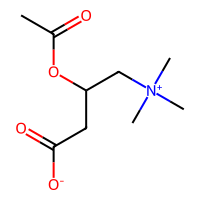
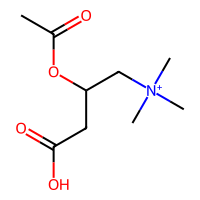
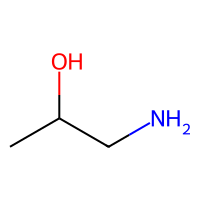
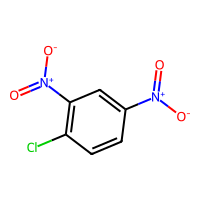
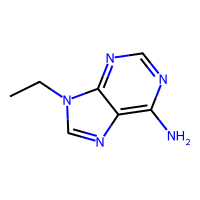
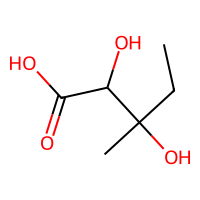
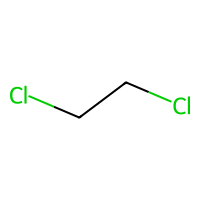
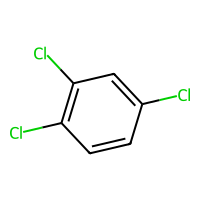
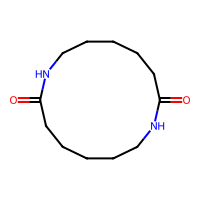
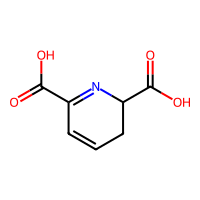

In [2]:
df = pd.DataFrame(
    data={
        'smiles':[
            'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
            'CC(=O)OC(CC(=O)O)C[N+](C)(C)C',
            'CC(CN)O',
            'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
            'CCN1C=NC2=C(N=CN=C21)N',
            'CCC(C)(C(C(=O)O)O)O',
            'C(CCl)Cl',
            'C1=CC(=C(C=C1Cl)Cl)Cl',
            'C1CCC(=O)NCCCCCC(=O)NCC1',
            'C1C=CC(=NC1C(=O)O)C(=O)O'
        ],
        'mw':[
            203.24,
            204.24,
            75.11,
            202.55,
            163.18,
            148.16,
            98.96,
            181.4,
            226.32,
            169.13
        ]
    }
)

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')

def morgan_fp(mol):
    morgan = AllChem.GetMorganGenerator(radius=2, fpSize=512)
    return morgan.GetFingerprint(mol)

df['morgan'] = df['ROMol'].apply(morgan_fp)
df

***

## Calculando similaridade: molécula - molécula

### Atenção: para a aplicação do algoritmo de similaridade, as moléculas devem ser do tipo rdkit.DataStructs.cDataStructs.*

In [3]:
from rdkit import DataStructs

In [4]:
def matrix_Tanimoto(mols):
    matrix = []
    
    for mol in mols:

        array_similaridade = DataStructs.BulkTanimotoSimilarity(mol, mols)
        matrix.append(array_similaridade)

    return pd.DataFrame(data=matrix)

tanimoto = matrix_Tanimoto(df['morgan'])
tanimoto

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.700000,0.156250,0.113636,0.039216,0.189189,0.033333,0.000000,0.075000,0.088889
1,0.700000,1.000000,0.161290,0.066667,0.040000,0.228571,0.034483,0.000000,0.050000,0.116279
2,0.156250,0.161290,1.000000,0.062500,0.085714,0.208333,0.142857,0.041667,0.000000,0.030303
3,0.113636,0.066667,0.062500,1.000000,0.086957,0.078947,0.076923,0.275862,0.081081,0.069767
4,0.039216,0.040000,0.085714,0.086957,1.000000,0.097561,0.066667,0.108108,0.023256,0.063830
5,0.189189,0.228571,0.208333,0.078947,0.097561,1.000000,0.045455,0.000000,0.029412,0.138889
6,0.033333,0.034483,0.142857,0.076923,0.066667,0.045455,1.000000,0.055556,0.000000,0.000000
7,0.000000,0.000000,0.041667,0.275862,0.108108,0.000000,0.055556,1.000000,0.033333,0.088235
8,0.075000,0.050000,0.000000,0.081081,0.023256,0.029412,0.000000,0.033333,1.000000,0.081081
9,0.088889,0.116279,0.030303,0.069767,0.063830,0.138889,0.000000,0.088235,0.081081,1.000000


***

## Agrupando moléculas por similaridade

In [5]:
from rdkit.ML.Cluster import Butina

In [6]:
def butina(fingerprints):
    matrix = []

    for i in range(len(fingerprints)):
        for j in range(i):
            similaridade = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
            matrix.append(1 - similaridade)

    clusters = Butina.ClusterData(data=matrix, nPts=len(fingerprints), distThresh=.4, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)

    return clusters

In [7]:
clusters = butina(df['morgan'])
clusters

[(1, 0), (9,), (8,), (7,), (6,), (5,), (4,), (3,), (2,)]

,smiles,mw,ROMol,morgan,cluster
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.0
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.0
2,CC(CN)O,75.11,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0
4,CCN1C=NC2=C(N=CN=C21)N,163.18,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",6.0
5,CCC(C)(C(C(=O)O)O)O,148.16,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0
6,C(CCl)Cl,98.96,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0

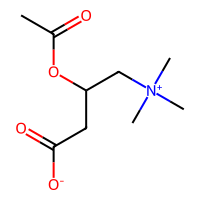
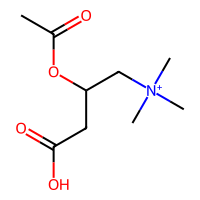
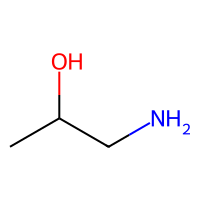
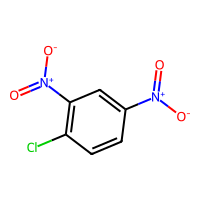
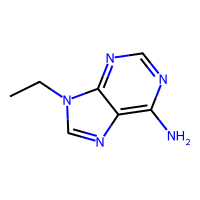
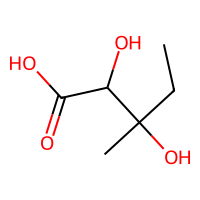
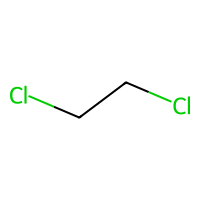
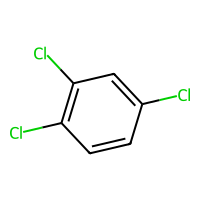
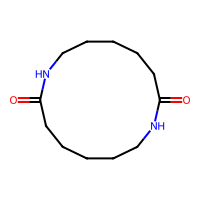
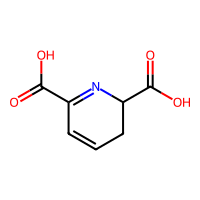

In [8]:
df['cluster'] = np.nan

for indice in range(len(clusters)):
    for registro in clusters[indice]:
        df.loc[registro, 'cluster'] = indice

df